<div>This file creates the filtered data set used for training the final model.</div>
<div> 
Preconditions files:
</div>

- aloi_red4_col/png images folder
- annotations_text.csv
- annotations_encoded.csv

<div> 
Criteria's:
</div>

- We keep each set of object images seperate from training/val/test set (i.e. image folder 13 put in training, then these images will only occur there)
- split is done 80/10/10
- Top 4 classes and remainders and unique object occurence: ('plastic', 290), ('other', 240), ('paper', 77), ('wood', 68), ('metal', 62)| (if you want total images just multiply that count by 12)


In [2]:
import pandas as pd
import numpy as np
import torch
import os
import shutil
import sklearn

c:\Users\Frank\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('annotations_text.csv')

In [4]:
#convert material string back to list
def convert_to_list(x):
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace('\'','')
    x = x.replace('\'','')
    x = x.replace(' ','')
    x = x.split(',')
    return x

test = df['Material'][0]

In [5]:
df['Material'] = df['Material'].apply(convert_to_list)

In [6]:
df

,Unnamed: 0,No.,Object name,Material,Stained,Surface properties
0,0,1,Christmas bear,[cloth],['pluriform'],['']
1,1,2,Lab-keys,"[metal, cloth]",[''],"['composite', 'shiny']"
2,2,3,Apricot,[fruit],['uniform'],['']
3,3,4,Round candle,"[candle, metal]",[''],"['composite', 'shiny']"
4,4,5,Nut,[wood],['uniform'],['ribbed']
...,...,...,...,...,...,...
995,995,996,lotion,"[plastic, paper]",['pluriform'],"['shiny', 'composite']"
996,996,997,cleansing milk,"[plastic, paper]",['pluriform'],"['shiny', 'composite']"
997,997,998,vogue deodorant,"[metal, plastic]",['pluriform'],"['shiny', 'composite']"
998,998,999,ALOI recording,"[metal, plastic]",['uniform'],"['shiny', 'composite']"


In [7]:
#count frequency of materials only for singular materials

material_list = {"other": 0}

for i in range(len(df)):
    if len(df['Material'][i]) == 1:
        if df['Material'][i][0] in material_list:
            material_list[df['Material'][i][0]] += 1
        else:
            material_list[df['Material'][i][0]] = 1
    else:
        material_list["other"] += 1
#sort material list by frequency
material_list = sorted(material_list.items(), key=lambda x: x[1], reverse=True)
material_list

[('plastic', 290),
 ('other', 240),
 ('paper', 77),
 ('wood', 68),
 ('metal', 62),
 ('pottery', 58),
 ('cloth', 48),
 ('fruit', 29),
 ('vegetable', 24),
 ('stone', 17),
 ('glass', 17),
 ('shell', 13),
 ('food', 13),
 ('rubber', 9),
 ('candle', 6),
 ('', 6),
 ('sponge', 5),
 ('rope', 5),
 ('flower', 4),
 ('wire', 3),
 ('copper', 2),
 ('cane', 1),
 ('foam', 1),
 ('cotton', 1),
 ('feathers', 1)]

In [8]:
#count frequency of materials only for singular materials by top 4 materials

material_list = {"other": 0, 'plastic':0, 'paper':0, 'wood':0, 'metal':0}

for i in range(len(df)):
    if len(df['Material'][i]) == 1:
        if df['Material'][i][0] == 'plastic':
            material_list["plastic"] += 1
        elif df['Material'][i][0] == 'paper':
            material_list["paper"] += 1
        elif df['Material'][i][0] == 'wood':
            material_list["wood"] += 1
        elif df['Material'][i][0] == 'metal':
            material_list["metal"] += 1
        else:
            material_list["other"] += 1
    

#sort material list by frequency
material_list = sorted(material_list.items(), key=lambda x: x[1], reverse=True)


In [9]:
material_list

[('plastic', 290), ('other', 263), ('paper', 77), ('wood', 68), ('metal', 62)]

Create new csv name and class column:

- plastic
- other
- paper
- wood
- metal

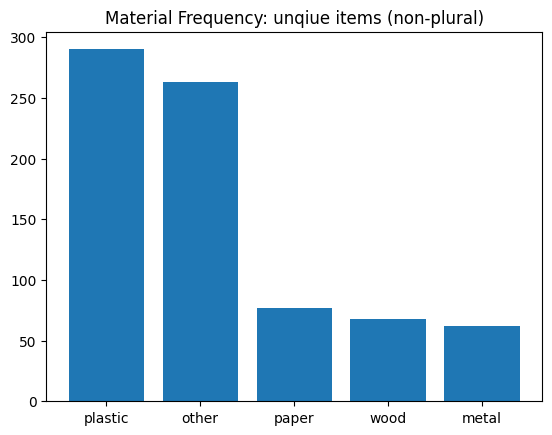

In [10]:
#histogram of material frequency
import matplotlib.pyplot as plt
plt.bar([x[0] for x in material_list], [x[1] for x in material_list])
plt.title('Material Frequency: unqiue items (non-plural)')
plt.show()

In [11]:
#create dataframe name_img, material for top 4 materials and other
df_top4 = pd.DataFrame(columns=['name_img', 'material'])
image_source = "./aloi_red4_col/png4/"

count = 0
for folder in os.listdir(image_source):
    item_nr = int(folder)
    for image in os.listdir(image_source + folder):
        count += 1
        name_img = image
        material = df["Material"][item_nr-1]
        material_name = ""
        if (len(material) == 1):
            if (material[0] == 'plastic'):
                material_name = "plastic"
            elif (material[0] == 'paper'):
                material_name = "paper"
            elif (material[0] == 'wood'):
                material_name = "wood"
            elif (material[0] == 'metal'):
                material_name = "metal"
            else:
                material_name = "other"
            df_top4.loc[count] = [name_img, material_name]


In [12]:
#save csv file
df_top4.to_csv('top4_materials.csv', index=False)

In [13]:
#copy images to new folder
image_source = "./aloi_red4_col/png4/"
image_dest = "./top4_materials_non_plural/"

if not os.path.exists(image_dest):
    os.makedirs(image_dest)


for folder in os.listdir(image_source):
    item_nr = int(folder)
    material = df["Material"][item_nr-1]
    if (len(material) == 1):
        shutil.copytree(image_source + folder, image_dest + folder)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: './top4_materials_non_plural/1'

In [ ]:
#calculate the weight of each material
#general formula is as follow suppose we have 3 classes with probability p1, p2, p3
#Then ideally we want p1=1/3, p2=1/3, p3=1/3
#so w_1 is such that p1*w_1 = 1/3

In [14]:
#calculate the weight of each material

data_frame_top4 = pd.read_csv('top4_materials.csv')
data_frame_top4


,name_img,material
0,1_i110.png,other
1,1_i120.png,other
2,1_i130.png,other
3,1_i140.png,other
4,1_i150.png,other
...,...,...
9115,995_i180.png,other
9116,995_i190.png,other
9117,995_i210.png,other
9118,995_i230.png,other


In [15]:
class_labels = np.unique(data_frame_top4['material'])
class_labels

array(['metal', 'other', 'paper', 'plastic', 'wood'], dtype=object)

In [16]:
sklearn.utils.class_weight.compute_class_weight(class_weight='balanced', classes= class_labels, y=data_frame_top4['material'])

array([2.4516129 , 0.57794677, 1.97402597, 0.52413793, 2.23529412])